# Linearer Kongruenzgenerator (LCG)

Dies ist eine simple Implementation für einen Linearen Kongruenzgenerator, der als Iterator in Python funktioniert. Der LCG erzeugt zufällig aussehende Zahlen in Abhängigkeit von seinen Parametern.

In [1]:
class LCG:
    def __init__(self, mod: int, a: int, c: int, seed: int):
        (self.mod, self.a, self.c, self.seed) = (mod, a, c, seed)

    def __iter__(self):
        return self

    def __next__(self):
        self.seed = (self.a * self.seed + self.c) % self.mod
        return self.seed


class LCG_01:
    def __init__(self, mod: int, a: int, c: int, seed: int):
        self.mod = mod
        self.a = a
        self.c = c
        self.seed = seed

    def __iter__(self):
        return self

    def __next__(self):
        self.seed = (self.a * self.seed + self.c) % self.mod
        return self.seed / self.mod


In [2]:
import itertools

In [3]:
lcg = iter(LCG(mod=8, a=5, c=3, seed=1))

prng = itertools.islice(lcg, 10)
print(list(prng))

[0, 3, 2, 5, 4, 7, 6, 1, 0, 3]


In [4]:
lcg = iter(LCG_01(mod=8, a=5, c=3, seed=1))

prng = itertools.islice(lcg, 10)
print(list(prng))

[0.0, 0.375, 0.25, 0.625, 0.5, 0.875, 0.75, 0.125, 0.0, 0.375]


In [5]:
lcg = iter(LCG(mod=256, a=5, c=3, seed=1))

prng = itertools.islice(lcg, 1000)
print(list(prng))

[8, 43, 218, 69, 92, 207, 14, 73, 112, 51, 2, 13, 68, 87, 182, 145, 216, 59, 42, 213, 44, 223, 94, 217, 64, 67, 82, 157, 20, 103, 6, 33, 168, 75, 122, 101, 252, 239, 174, 105, 16, 83, 162, 45, 228, 119, 86, 177, 120, 91, 202, 245, 204, 255, 254, 249, 224, 99, 242, 189, 180, 135, 166, 65, 72, 107, 26, 133, 156, 15, 78, 137, 176, 115, 66, 77, 132, 151, 246, 209, 24, 123, 106, 21, 108, 31, 158, 25, 128, 131, 146, 221, 84, 167, 70, 97, 232, 139, 186, 165, 60, 47, 238, 169, 80, 147, 226, 109, 36, 183, 150, 241, 184, 155, 10, 53, 12, 63, 62, 57, 32, 163, 50, 253, 244, 199, 230, 129, 136, 171, 90, 197, 220, 79, 142, 201, 240, 179, 130, 141, 196, 215, 54, 17, 88, 187, 170, 85, 172, 95, 222, 89, 192, 195, 210, 29, 148, 231, 134, 161, 40, 203, 250, 229, 124, 111, 46, 233, 144, 211, 34, 173, 100, 247, 214, 49, 248, 219, 74, 117, 76, 127, 126, 121, 96, 227, 114, 61, 52, 7, 38, 193, 200, 235, 154, 5, 28, 143, 206, 9, 48, 243, 194, 205, 4, 23, 118, 81, 152, 251, 234, 149, 236, 159, 30, 153, 0, 3, 18

In [6]:
lcg = iter(LCG_01(mod=9, a=7, c=4, seed=1))

prng = itertools.islice(lcg, 19)
print(list(prng))

[0.2222222222222222, 0.0, 0.4444444444444444, 0.5555555555555556, 0.3333333333333333, 0.7777777777777778, 0.8888888888888888, 0.6666666666666666, 0.1111111111111111, 0.2222222222222222, 0.0, 0.4444444444444444, 0.5555555555555556, 0.3333333333333333, 0.7777777777777778, 0.8888888888888888, 0.6666666666666666, 0.1111111111111111, 0.2222222222222222]


In [7]:
lcg = iter(LCG(mod=9, a=5, c=3, seed=1))

prng = itertools.islice(lcg, 10)
print(list(prng))

[8, 7, 2, 4, 5, 1, 8, 7, 2, 4]


In [8]:
lcg = iter(LCG(mod=9, a=6, c=4, seed=1))

prng = itertools.islice(lcg, 10)
print(list(prng))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Darstellung

Die folgenden Diagramme dienen zur Darstellung von Abhängigkeiten in der Folge der vom Generator erzeugten Pseudozufallszahlen.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import locale

locale.setlocale(locale.LC_NUMERIC, "de_DE")

plt.rcParams['axes.formatter.use_locale'] = True
plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.family"] = "Source Sans Pro"
plt.rcParams["mathtext.fontset"] = "cm"

In [10]:
def show_dependency(lcg):
    prng = itertools.islice(lcg, 5000)
    x_i = list(prng)
    # x_i - 1
    x_i_1 = deque(x_i)
    x_i_1.rotate(-1)

    x_i = x_i[1:-1]
    x_i_1 = list(x_i_1)[1:-1]
    return (x_i, x_i_1)


def scatter_plot(x, y, label, mod):
    filename = f"figures/mod{mod}," + "".join(label.replace("$", "").lower().split())
    plt.scatter(x, y, s=5, marker="o")
    plt.title(label)
    plt.ylabel("$x_{i-1}$")
    plt.xlabel("$x_i$")
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.savefig(filename , dpi=200, bbox_inches='tight', transparent=True)
    plt.show()


In [11]:
to_test = [
    # (mod, a, c, seed)
    (256, 21, 1, 1),
    (256, 31, 1, 1),
    (256, 87, 1, 1),
    (256, 129, 1, 1),
    (2**16 - 1, 8430, 1, 1),
    (2**16 - 1, 12436, 1, 1),
    (2**16 - 1, 16807, 1, 1),
    (2**16 - 1, 48271, 1, 1),
    (2**31 - 1, 16807, 0, 1),
    (2**31 - 1, 48271, 0, 1),
]


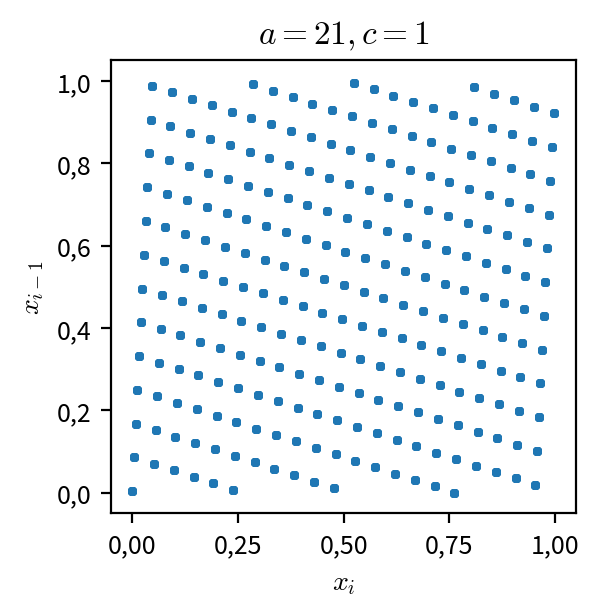

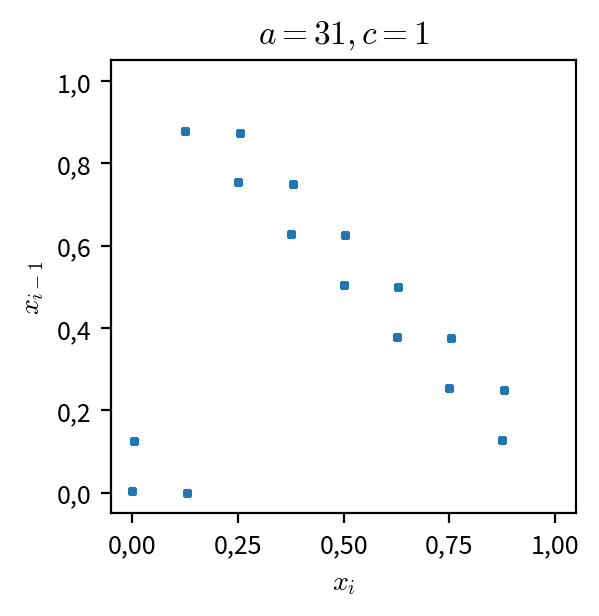

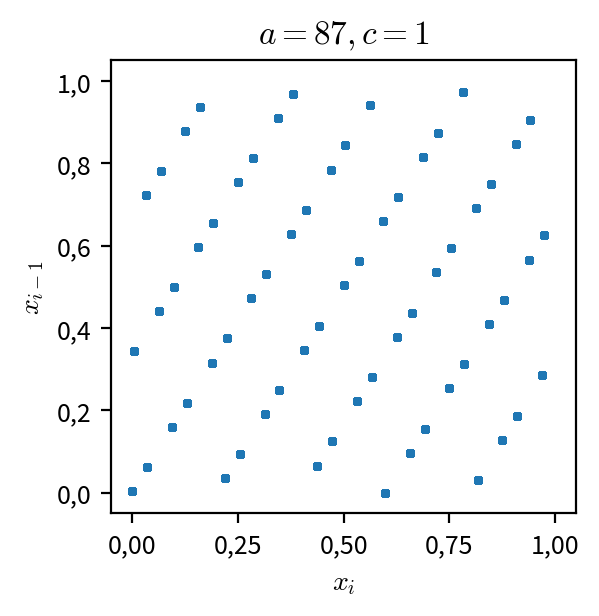

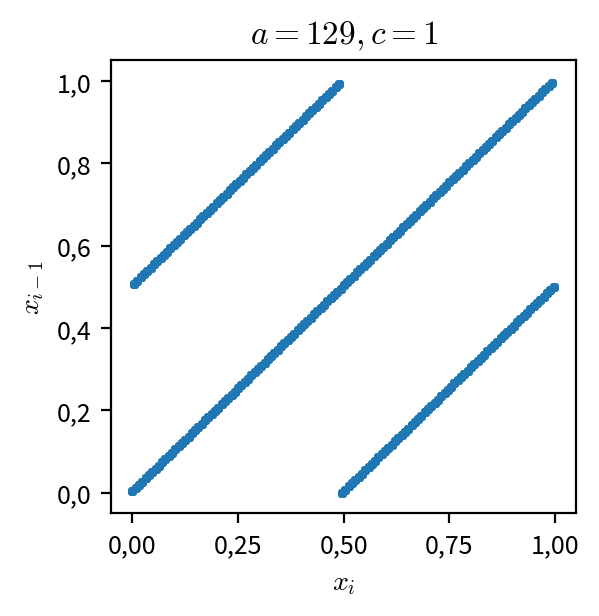

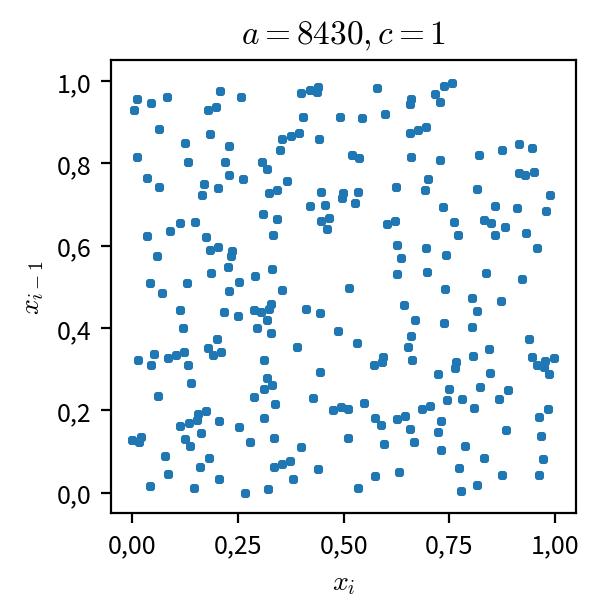

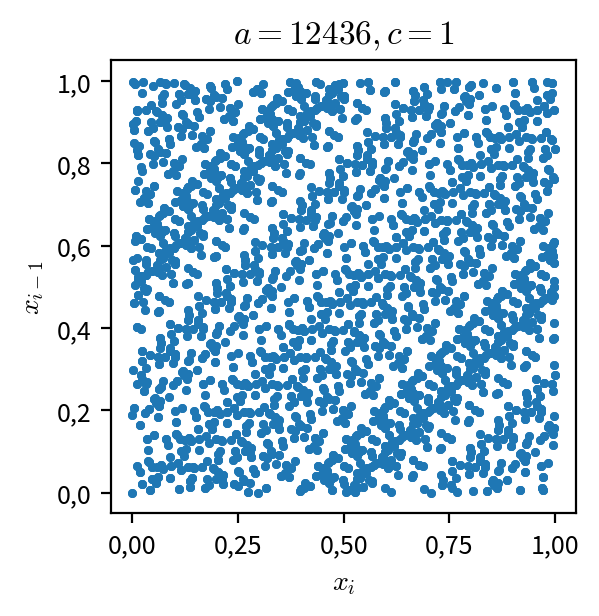

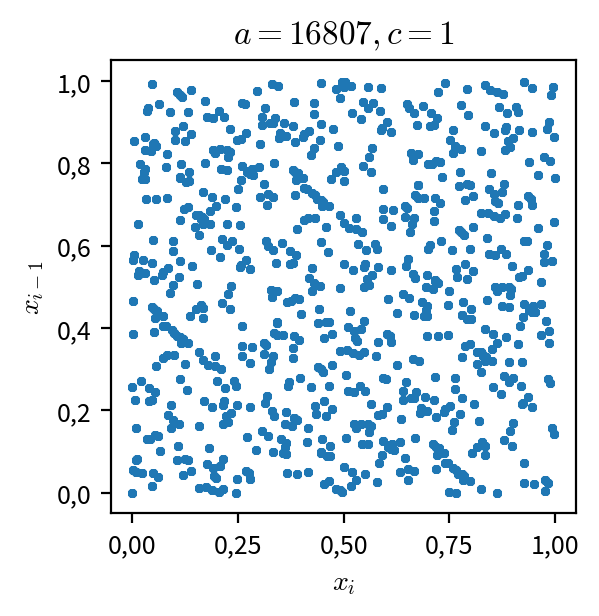

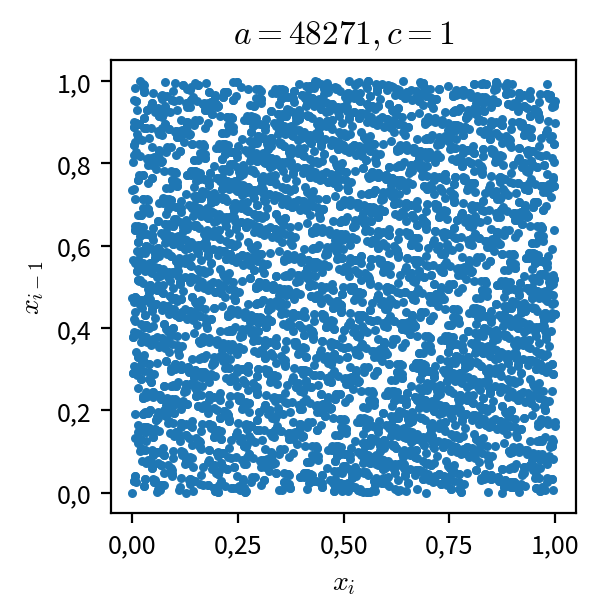

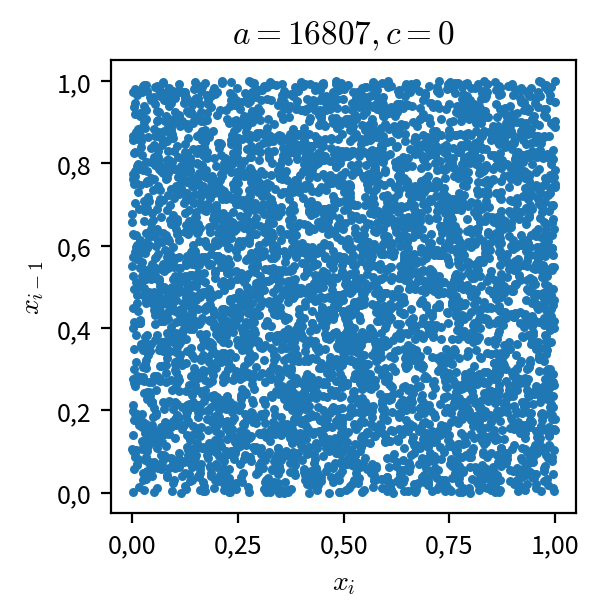

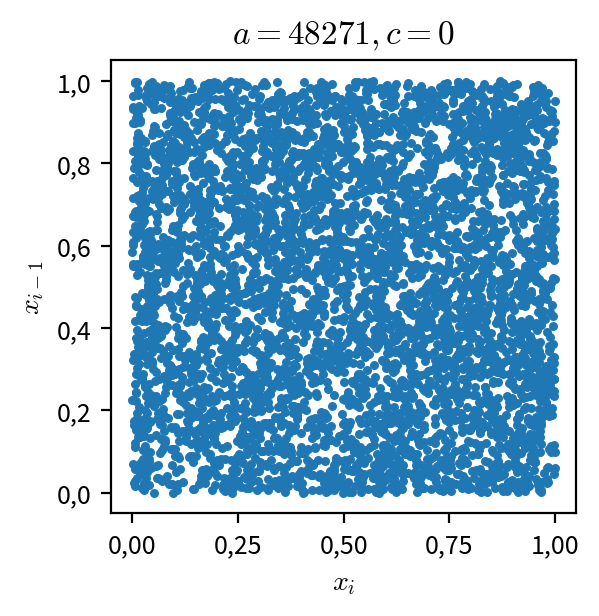

In [12]:
for (mod, a, c, seed) in to_test:
    lcg = iter(LCG_01(mod=mod, a=a, c=c, seed=seed))
    (x, y) = show_dependency(lcg)
    scatter_plot(x, y, f"$a={a}, c={c}$", mod=mod)

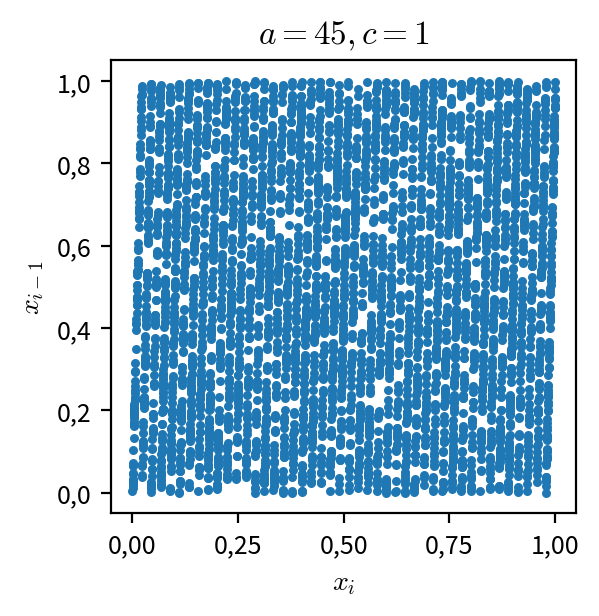

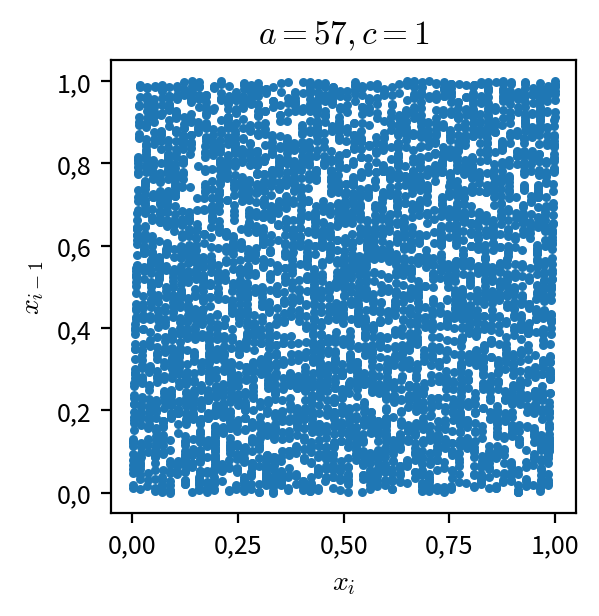

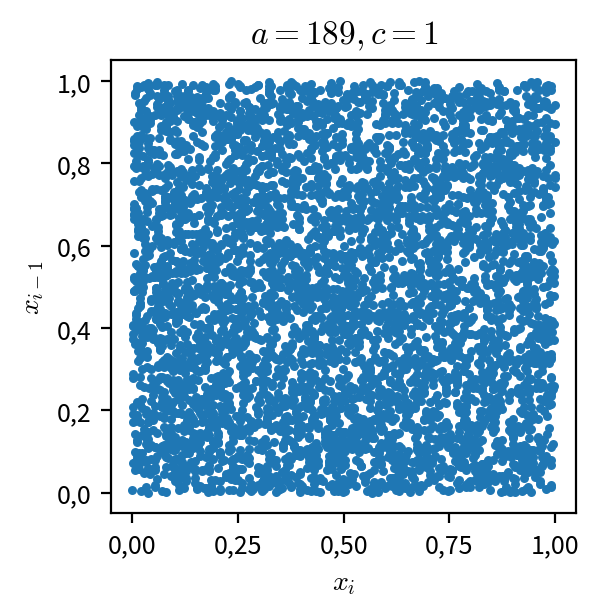

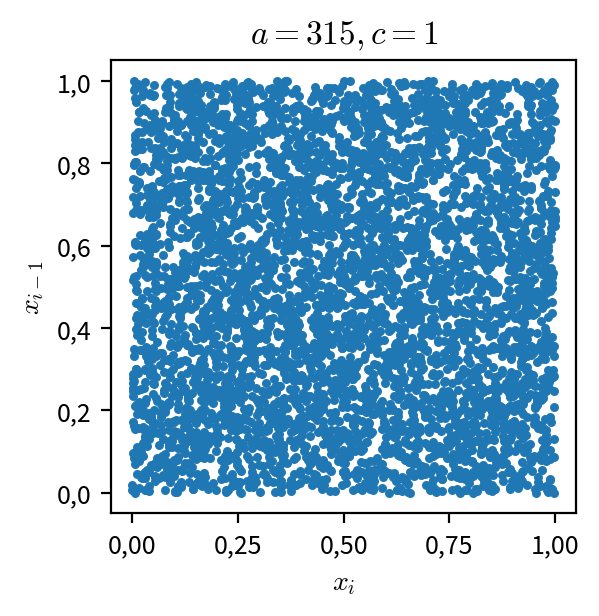

In [13]:
to_test = [
    (2**24, 45, 1, 1),
    (2**24, 57, 1, 1),
    (2**24, 189, 1, 1),
    (2**24, 315, 1, 1),
]

for (mod, a, c, seed) in to_test:
    lcg = iter(LCG_01(mod=mod, a=a, c=c, seed=seed))
    (x, y) = show_dependency(lcg)
    scatter_plot(x, y, f"$a={a}, c={c}$", mod=mod)

## Generierung von Bytes

Aus dem Output des Linearen Kongruenzgenerators im Intervall [0,1) werden Bytes erzeugt. Dafür wird der Wert mit 256 multipliziert und abgerundet.
Alternativ könnte man auch einzelne Bits erzeugen, dann müsste man aber 8 Mal so viele Iterationen durchgehen für die gleiche Anzahl an Bytes.

*Der folgende Code ist sehr ineffizient für größere Dateien und strapaziert zusätzlich das Speichermedium.*

In [14]:
import math

base = 2 ** 8

# (2**24, 315, 1, 1),
# (2**31 - 1, 16807, 0, 1),
# (2**31 - 1, 48271, 0, 1),
mod = 2**31 - 1
a = 48271
c = 0

lcg = iter(LCG_01(mod=mod, a=a, c=c, seed=1))
# lcg = iter(LCG_01(mod=2**31 - 1, a=48271, c=0, seed=1))

i = 0

with open(f"resources/lcg_mod{mod}_a{a}_c{c}.dat", "wb") as f:

    for tmp in lcg:
        if i >= 1024*1024:
            break

        num = math.floor(tmp * base)
        f.write(num.to_bytes(1, byteorder="big"))

        if(i % 100000000 == 0):
            print(i)
        i+=1 


0
